# Examples: Simple

In [1]:
import numpy as np
import sys
sys.path.append("../")
from IoTPy.core.stream import Stream, StreamArray, run
from IoTPy.agent_types.basics import map_e
from IoTPy.helper_functions.recent_values import recent_values

In [2]:
#--------------------------------------------------------
# Agent that evaluates a polynomial on values in a stream
#--------------------------------------------------------
@map_e
def evaluate_polynomial(number, polynomial):
    return np.polyval(polynomial, number)


In [3]:
def test_evaluate_polynomial():
    # Declare streams
    x = StreamArray('x')
    y = StreamArray('y')

    # Create agent
    evaluate_polynomial(x, y, polynomial=[1, 0, 1])

    # Put data in input streams
    x.extend(np.array([1.0, 4.0, 3.0, 0.0]))

    # Execute a step
    print ('running')
    run()

    # Look at values of output streams
    assert np.array_equal(
        recent_values(y), np.array([2.0, 17.0, 10.0, 1.0]))
    print (recent_values(y))
    
test_evaluate_polynomial()

running
[ 2. 17. 10.  1.]


In [4]:
from IoTPy.agent_types.basics import merge_e
#----------------------------------------------------
# Agent that computes the magnitude of a vector
#----------------------------------------------------
@merge_e 
def magnitude_of_vector(coordinates):
    return np.linalg.norm(coordinates)

In [5]:
def test_magnitude_of_vector():
    # Declare streams
    x = StreamArray('x')
    y = StreamArray('y')
    z = StreamArray('z')
    magnitude_stream = StreamArray('magnitudes')

    # Create agent
    magnitude_of_vector([x,y,z], magnitude_stream)

    # Put data in streams
    x.extend(np.array([1.0, 4.0, 3.0]))
    y.extend(np.array([2.0, 4.0, 0.0]))
    z.extend(np.array([2.0, 2.0, 4.0]))

    # Execute a step
    run()

    # Look at values of output streams
    assert np.array_equal(recent_values(magnitude_stream),
                           np.array([3.0, 6.0, 5.0]))
    print (recent_values(magnitude_stream))
test_magnitude_of_vector()

[3. 6. 5.]


In [6]:
from IoTPy.agent_types.basics import map_w
from IoTPy.agent_types.op import map_window
#----------------------------------------------------
# Agent that subtracts the mean in a stream
#----------------------------------------------------
def subtract_mean(in_stream, window_size):
    return_stream = StreamArray('return_stream_in_subtract_mean')
    map_window(func= lambda window: window[0] - np.mean(window),
               in_stream=in_stream, out_stream=return_stream, 
               window_size=window_size, step_size=1, name='subtract_mean')
    return return_stream

In [7]:
def test_subtract_mean():
    # Declare streams
    x = StreamArray('x')

    # Create agent
    y = subtract_mean(in_stream=x, window_size=4)

    # Put data in input streams
    x.extend(np.arange(8, dtype=float))

    # Execute a step
    run()

    # Look at values of output streams
    assert (np.array_equal(
        recent_values(y),
        np.array([-1.5, -1.5, -1.5, -1.5, -1.5])))
    print (recent_values(y))
test_subtract_mean()

[-1.5 -1.5 -1.5 -1.5 -1.5]


In [8]:
#----------------------------------------------------
# Agent that subtracts the mean in a stream in blocks
#----------------------------------------------------
@map_w
def subtract_mean_block(window, block_size):
    a = window - np.mean(window)
    print ('a is ', a)
    return a[:block_size]

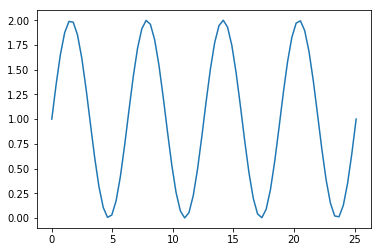

In [14]:
import matplotlib.pyplot as plt
NUM_CYCLES= 4
NUM_POINTS_PER_CYCLE=18

x = np.linspace(0, NUM_CYCLES*2*np.pi, num=NUM_CYCLES*NUM_POINTS_PER_CYCLE)
y = np.sin(x) + 1.0

plt.plot(x, y)
plt.show()

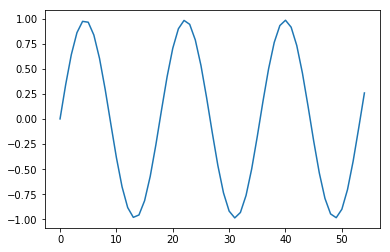

In [23]:
y_stream = StreamArray('y_stream')
z = subtract_mean(y_stream, window_size=18)
y_stream.extend(y)
run()
plt.plot(recent_values(z))
plt.show()

In [12]:
def test_subtract_mean_block():
    # Declare streams
    x = StreamArray('x')
    y = StreamArray('y')

    # Create agent
    subtract_mean_block(x, y, window_size=8, step_size=2, block_size=2)

    # Put data in input streams
    x.extend(np.arange(32, dtype=float))

    # Execute a step
    run()

    # Look at values in output streams
    print (recent_values(y))
test_subtract_mean_block()

a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]
a is  [-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]


AssertionError: Extending StreamArray y which has shape (i.e. dimension) 0 by an array with incompatible shape (2,)